In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pwd

'/home/pau/Desktop/Fisidabo_Final/Codi/Astronomical Data'

In [3]:
cart = [pd.read_csv("../Data/"+str(i)+"Cart.csv") for i in range(1,5)] #Llegeixo fitxers
cart = [c.drop('Unnamed: 0', 1) for c in cart] #Una guarrada, trec a mà una columna que em sobra

In [4]:
pol = [pd.read_csv("../Data/"+str(i)+"Pol.csv") for i in range(1,5)]
pol = [p.drop('Unnamed: 0', 1) for p in pol] #Una guarrada, trec a mà una columna que em sobra

Hem de trobar: (semi)Període, perihelion precession, excentricitat i semieix major

In [5]:
#Trobem els màxims, per cada take
p = pol[0]

In [6]:
z = p.loc[abs(p['r-dot']) < 0.0027] #Aquestes precisions són amb prova i error 
z = z.loc[p['r-dotdot'] < 0] #obvi, no?
z

,t,phi,omega,alpha,r,r-dot,r-dotdot
403,2.238889,5.061959,1.281938,-0.019233,0.386377,0.001929,-1.251190
643,3.572222,8.441927,1.815490,0.008452,0.309412,0.001614,-1.077273
920,5.111111,13.061033,1.653063,0.004167,0.312830,-0.000612,-0.619983


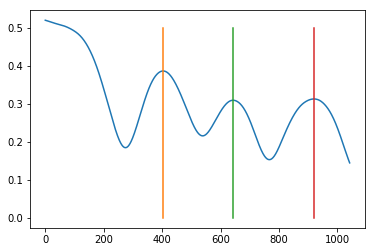

In [7]:
%matplotlib inline
plt.plot(p['r'])
for i in z.index.tolist():
    plt.plot((i,i), (0, 0.5)) #Sempre va bé veure un gràfic :)

In [8]:
maxims_1 = z

In [9]:
p = pol[1]

In [10]:
z = p.loc[abs(p['r-dot']) < 0.0027]
z = z.loc[p['r-dotdot'] < 0]
z = z.drop(z.index[[3]]) #A vegades he tret els duplicates a mà
z

,t,phi,omega,alpha,r,r-dot,r-dotdot
28,0.155556,0.257012,1.606302,-0.717342,0.400574,-0.001657,-0.836277
316,1.755556,4.221656,2.081260,0.506534,0.300785,0.000105,-0.631635
530,2.944444,7.658388,2.284474,-0.953660,0.261323,0.001013,-0.455887
825,4.583333,12.715063,2.255815,-1.373537,0.248730,0.001847,-0.894878
1049,5.827778,17.081513,2.856227,1.271863,0.197211,0.001673,-0.789028


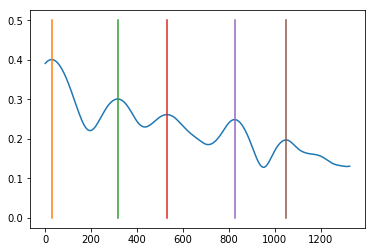

In [11]:
%matplotlib inline
plt.plot(p['r'])
for i in z.index.tolist():
    plt.plot((i,i), (0, 0.5))

In [12]:
maxims_2 = z

In [13]:
p = pol[2]
z = p.loc[abs(p['r-dot']) < 0.0027]
z = z.loc[p['r-dotdot'] < 0]
z = z.drop(z.index[[1,-2]])
z

,t,phi,omega,alpha,r,r-dot,r-dotdot
107,0.594444,1.297958,1.678572,-0.746134,0.363604,0.000282,-0.802746
426,2.366667,5.925370,2.005699,-0.401490,0.305283,-0.000409,-0.502898
673,3.738889,9.958287,1.795531,-0.180724,0.242513,-0.002499,-1.068311
888,4.933333,13.842392,1.806601,-1.044155,0.249192,0.001887,-1.221248
1136,6.311111,18.739458,2.436638,-0.860047,0.204701,-0.001581,-0.686295


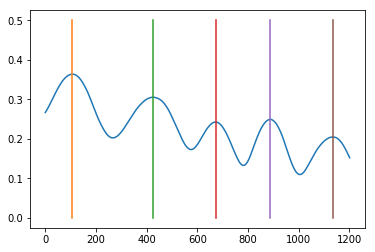

In [14]:
%matplotlib inline
plt.plot(p['r'])
for i in z.index.tolist():
    plt.plot((i,i), (0, 0.5))

In [15]:
maxims_3 = z

In [16]:
p = pol[3]
z = p.loc[abs(p['r-dot']) < 0.003]
z = z.loc[p['r-dotdot'] < 0]
z

,t,phi,omega,alpha,r,r-dot,r-dotdot
241,1.338889,3.683203,1.675956,0.758169,0.378450,-0.000049,-0.850489
532,2.955556,7.960408,1.517275,-0.883836,0.325926,-0.002871,-1.141231


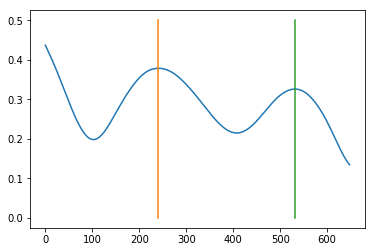

In [17]:
%matplotlib inline
plt.plot(p['r'])
for i in z.index.tolist():
    plt.plot((i,i), (0, 0.5))


In [18]:
maxims_4 = z

In [19]:
maxims = [maxims_1, maxims_2, maxims_3, maxims_4]

In [20]:
quantes_elipses = [2,4,4,1]

In [21]:
elipses = {}

In [22]:
for i in range(1,5):
    elipses[i] = {}
    for j in range(quantes_elipses[i-1]):
        elipses[i][j+1] = {}

In [23]:
elipses

{1: {1: {}, 2: {}},
 2: {1: {}, 2: {}, 3: {}, 4: {}},
 3: {1: {}, 2: {}, 3: {}, 4: {}},
 4: {1: {}}}

In [24]:
#Com iterar pel diccionari xetat
for take in elipses:
    for elipse in elipses[take]:
        pass
        #assert(elipses[take][elipse]['l'] < elipses[take][elipse]['L'])

# Periode OK

In [25]:
i = 0
for dataset in maxims:
    i+=1
    temps = list(dataset.t)
    for j in range(len(temps)-1):
        elipses[i][j+1]['t'] = temps[j+1]-temps[j]
        print(i, j+1, temps[j+1]-temps[j])

1 1 1.3333333329999997
1 2 1.5388888890000008
2 1 1.5999999999999943
2 2 1.18888888888889
2 3 1.6388888888888795
2 4 1.24444444444444
3 1 1.772222222222217
3 2 1.37222222222222
3 3 1.1944444444444402
3 4 1.3777777777777702
4 1 1.61666666666666


# Semieix Major OK 

In [26]:
i = 0
for dataset in maxims:
    i+=1
    indexos_maxims = list(dataset.transpose())
    for j in range(len(indexos_maxims)-1):
        max1 = indexos_maxims[j]
        max2 = indexos_maxims[j+1]
        index_minim = pol[i-1].r[max1:max2].idxmin()
        afeli = pol[i-1].r[index_minim]
        periheli = 0.5*(pol[i-1].r[max1] + pol[i-1].r[max2])
        elipses[i][j+1]['L'] = (afeli+periheli)/2

In [27]:
elipses

{1: {1: {'L': 0.28184624695753752, 't': 1.3333333329999997},
  2: {'L': 0.23217574863729576, 't': 1.5388888890000008}},
 2: {1: {'L': 0.28579164739621871, 't': 1.5999999999999943},
  2: {'L': 0.25552427611644646, 't': 1.18888888888889},
  3: {'L': 0.220229590970276, 't': 1.6388888888888795},
  4: {'L': 0.17552464485251351, 't': 1.24444444444444}},
 3: {1: {'L': 0.26845971958832127, 't': 1.772222222222217},
  2: {'L': 0.22343039389208952, 't': 1.37222222222222},
  3: {'L': 0.1893539626682465, 't': 1.1944444444444402},
  4: {'L': 0.16834463877026024, 't': 1.3777777777777702}},
 4: {1: {'L': 0.28353142360328398, 't': 1.61666666666666}}}

Semieix Menor

In [28]:
dist_acc = {}
for i in range(1,5):
    df = cart[i-1]
    delta_x = [0]+[df.x[i+1]-df.x[i] for i in range(len(df)-1)]
    delta_y = [0]+[df.y[i+1]-df.y[i] for i in range(len(df)-1)]
    dist = [np.sqrt(a**2 + b**2) for a,b in zip(delta_x, delta_y)]
    dist_acc[i] = np.cumsum(dist)
    

In [29]:
i = 0
for dataset in maxims:
    i+=1
    indexos_maxims = list(dataset.transpose())
    for j in range(len(indexos_maxims)-1):
        max1 = indexos_maxims[j]
        max2 = indexos_maxims[j+1]
        index_minim = pol[i-1].r[max1:max2].idxmin()
        afeli = pol[i-1].r[index_minim]
        d1 = dist_acc[i][max1]
        d2 = dist_acc[i][index_minim]
        d3 = dist_acc[i][max2]
        i1 = np.min(np.where(dist_acc[i]>(d1+d2)/2))
        i2 = np.min(np.where(dist_acc[i]>(d2+d3)/2))
        v = [pol[i-1].r[i1], pol[i-1].r[i2]]
        l1 = np.sqrt(-(elipses[i][j+1]['L']-afeli)**2 + v[0]**2)
        l2 = np.sqrt(-(elipses[i][j+1]['L']-afeli)**2 + v[1]**2)
        elipses[i][j+1]['l'] = 0.5*(l1+l2)

In [30]:
elipses

{1: {1: {'L': 0.28184624695753752,
   'l': 0.26512352252207771,
   't': 1.3333333329999997},
  2: {'L': 0.23217574863729576,
   'l': 0.21789919385831846,
   't': 1.5388888890000008}},
 2: {1: {'L': 0.28579164739621871,
   'l': 0.2786463844464549,
   't': 1.5999999999999943},
  2: {'L': 0.25552427611644646,
   'l': 0.25165738883553024,
   't': 1.18888888888889},
  3: {'L': 0.220229590970276,
   'l': 0.21148022041433875,
   't': 1.6388888888888795},
  4: {'L': 0.17552464485251351,
   'l': 0.17196973157213469,
   't': 1.24444444444444}},
 3: {1: {'L': 0.26845971958832127,
   'l': 0.25677362139418614,
   't': 1.772222222222217},
  2: {'L': 0.22343039389208952,
   'l': 0.21581866373242387,
   't': 1.37222222222222},
  3: {'L': 0.1893539626682465,
   'l': 0.17618013698663706,
   't': 1.1944444444444402},
  4: {'L': 0.16834463877026024,
   'l': 0.15625523988913589,
   't': 1.3777777777777702}},
 4: {1: {'L': 0.28353142360328398,
   'l': 0.26923792083564541,
   't': 1.61666666666666}}}

In [31]:
def ploteja(take, elipse):
    plt.close()
    dataset = maxims[take-1]
    indexos_maxims = list(dataset.transpose())
    plt.plot(cart[take-1].x[indexos_maxims[elipse-1]:indexos_maxims[elipse]],cart[take-1].y[indexos_maxims[elipse-1]:indexos_maxims[elipse]])
    max1 = indexos_maxims[elipse-1]
    max2 = indexos_maxims[elipse]
    index_minim = pol[take-1].r[max1:max2].idxmin()
    afeli = pol[take-1].r[index_minim]
    d1 = dist_acc[take][max1]
    d2 = dist_acc[take][index_minim]
    d3 = dist_acc[take][max2]
    i1 = np.min(np.where(dist_acc[take]>(d1+d2)/2))
    i2 = np.min(np.where(dist_acc[take]>(d2+d3)/2))

    plt.scatter(cart[take-1].x[i1],cart[take-1].y[i1], c = 'b')
    plt.scatter(cart[take-1].x[i2],cart[take-1].y[i2], c = 'b')
    plt.scatter(0,0, s = 3000)
    plt.scatter(cart[take-1].x[max1],cart[take-1].y[max1], c = 'r')
    plt.scatter(cart[take-1].x[max2],cart[take-1].y[max2], c = 'r')
    plt.scatter(cart[take-1].x[index_minim],cart[take-1].y[index_minim], c = 'y')
    plt.title("get validated son")
    plt.axis('equal')

In [32]:
def plotejat(take):
    plt.close()
    dataset = maxims[take-1]
    for elipse in range(1,len(dataset)):
        indexos_maxims = list(dataset.transpose())
        plt.plot(cart[take-1].x[indexos_maxims[elipse-1]:indexos_maxims[elipse]],cart[take-1].y[indexos_maxims[elipse-1]:indexos_maxims[elipse]])
        max1 = indexos_maxims[elipse-1]
        max2 = indexos_maxims[elipse]
        index_minim = pol[take-1].r[max1:max2].idxmin()
        afeli = pol[take-1].r[index_minim]
        d1 = dist_acc[take][max1]
        d2 = dist_acc[take][index_minim]
        d3 = dist_acc[take][max2]
        i1 = np.min(np.where(dist_acc[take]>(d1+d2)/2))
        i2 = np.min(np.where(dist_acc[take]>(d2+d3)/2))
        """
        plt.scatter(cart[take-1].x[i1],cart[take-1].y[i1], c = 'b')
        plt.scatter(cart[take-1].x[i2],cart[take-1].y[i2], c = 'b')
        plt.scatter(cart[take-1].x[max1],cart[take-1].y[max1], c = 'r')
        plt.scatter(cart[take-1].x[max2],cart[take-1].y[max2], c = 'r')
        plt.scatter(cart[take-1].x[index_minim],cart[take-1].y[index_minim], c = 'y')
        """
        plt.scatter(0,0, s = 1000)
        plt.title("get validated son")
        plt.axis('equal')

In [33]:
elipses[4]

{1: {'L': 0.28353142360328398,
  'l': 0.26923792083564541,
  't': 1.61666666666666}}

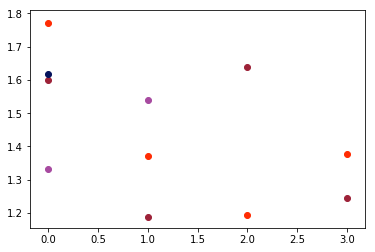

In [34]:
colors = np.random.random((6,3))
for j in range(1,5):
    #plt.plot([elipses[j][i+1]['l'] for i in range(len(elipses[j]))], c = colors[j])
    #plt.plot([elipses[j][i+1]['L'] for i in range(len(elipses[j]))], c = colors[j])
    v = [elipses[j][i+1]['t'] for i in range(len(elipses[j]))]
    plt.scatter(range(len(v)), v, c = colors[j])

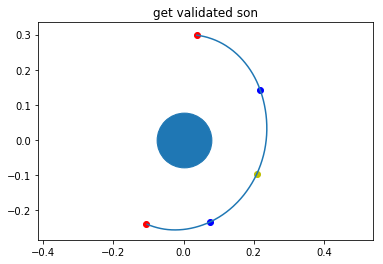

In [35]:
ploteja(2,2)

(-0.25429665583945316,
 0.34617094277732618,
 -0.39245092195400433,
 0.33289656760218628)

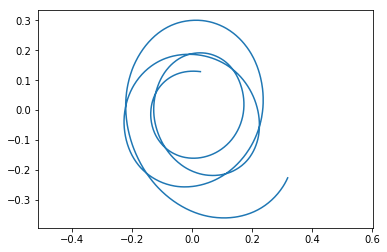

In [36]:
plt.plot(cart[1].x, cart[1].y)
plt.axis('equal')

In [37]:
i = 0
for dataset in maxims:
    i+=1
    indexos_maxims = list(dataset.transpose())
    for j in range(len(indexos_maxims)-1):
        elipses[i][j+1]['e'] = np.sqrt(1-(elipses[i][j+1]['l']/elipses[i][j+1]['L'])**2)

In [38]:
elipses

{1: {1: {'L': 0.28184624695753752,
   'e': 0.33933051987091167,
   'l': 0.26512352252207771,
   't': 1.3333333329999997},
  2: {'L': 0.23217574863729576,
   'e': 0.34525284880252183,
   'l': 0.21789919385831846,
   't': 1.5388888890000008}},
 2: {1: {'L': 0.28579164739621871,
   'e': 0.22221210345266657,
   'l': 0.2786463844464549,
   't': 1.5999999999999943},
  2: {'L': 0.25552427611644646,
   'e': 0.17331268967296162,
   'l': 0.25165738883553024,
   't': 1.18888888888889},
  3: {'L': 0.220229590970276,
   'e': 0.27906713411620293,
   'l': 0.21148022041433875,
   't': 1.6388888888888795},
  4: {'L': 0.17552464485251351,
   'e': 0.20023974927755117,
   'l': 0.17196973157213469,
   't': 1.24444444444444}},
 3: {1: {'L': 0.26845971958832127,
   'e': 0.29183123745886019,
   'l': 0.25677362139418614,
   't': 1.772222222222217},
  2: {'L': 0.22343039389208952,
   'e': 0.25879439137071159,
   'l': 0.21581866373242387,
   't': 1.37222222222222},
  3: {'L': 0.1893539626682465,
   'e': 0.366475

In [39]:
#Perihelion Precession

In [40]:
maxims[0]

,t,phi,omega,alpha,r,r-dot,r-dotdot
403,2.238889,5.061959,1.281938,-0.019233,0.386377,0.001929,-1.251190
643,3.572222,8.441927,1.815490,0.008452,0.309412,0.001614,-1.077273
920,5.111111,13.061033,1.653063,0.004167,0.312830,-0.000612,-0.619983


In [41]:
i = 0
for dataset in maxims:
    i+=1
    angles = list(dataset.phi)
    for j in range(len(angles)-1):
        elipses[i][j+1]['peri'] = angles[j+1]-angles[j]-2*np.pi
        print(i, j+1, angles[j+1]-angles[j] - 2*np.pi)

1 1 -2.9032169245858457
1 2 -1.6640795550695682
2 1 -2.3185411933930022
2 2 -2.8464536128942353
2 3 -1.2265097564268768
2 4 -1.9167360885572862
3 1 -1.6557735566743963
3 2 -2.2502680608697654
3 3 -2.3990810975874783
3 4 -1.3861191630590852
4 1 -2.0059799799955655


In [42]:
import pickle

In [43]:
pickle.dump(elipses, open("resultats2.0.p", "wb"))

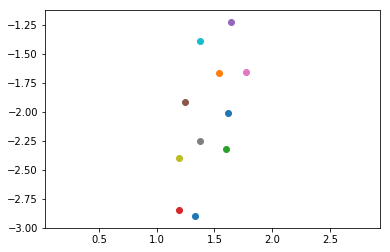

In [67]:
#Com iterar pel diccionari xetat
for take in elipses:
    for elipse in elipses[take]:
        plt.scatter(elipses[take][elipse]['t'], elipses[take][elipse]['peri'])
        plt.axis('equal')

In [64]:
from scipy oimport stats
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)


In [65]:
r_value**2

0.99007672597060881